<ipython-input-9-6cc5e458f147>:108: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  white_dot.set_data(current_x[-1], current_y[-1])
<ipython-input-9-6cc5e458f147>:117: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  white_dot.set_data(0, final_y)
<ipython-input-9-6cc5e458f147>:108: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  white_dot.set_data(current_x[-1], current_y[-1])
<ipython-input-9-6cc5e458f147>:117: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  white_dot.set_data(0, final_y)


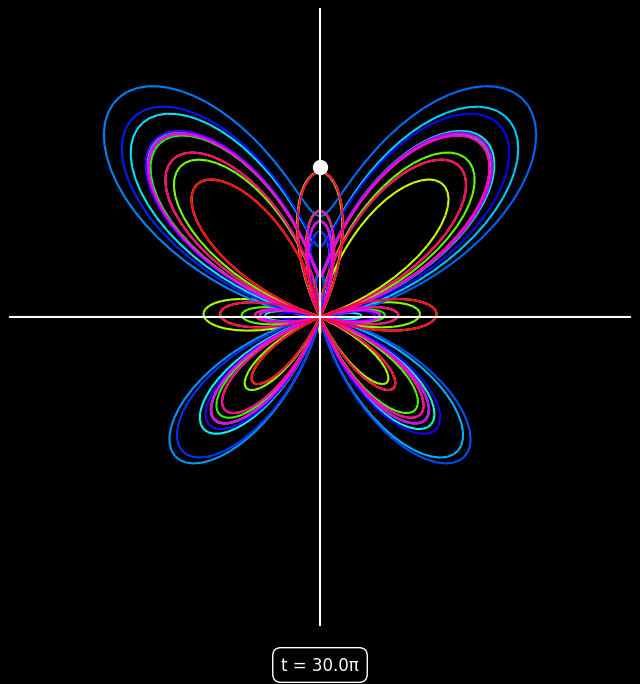

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# Define the parametric equations
def x(t):
    return np.sin(t) * (np.exp(np.cos(t)) - 2 * np.cos(4 * t) - np.sin(t / 12)**5)

def y(t):
    return np.cos(t) * (np.exp(np.cos(t)) - 2 * np.cos(4 * t) - np.sin(t / 12)**5)

# Define the range for t
t = np.linspace(0, 30 * np.pi, 3000)

# Compute the curves to find their range
x_vals = x(t)
y_vals = y(t)

# Scale factor to fit within the plot limits
scale_factor = 1.5 / max(np.max(np.abs(x_vals)), np.max(np.abs(y_vals)))

# Scaled equations
def x_scaled(t):
    return scale_factor * x(t)

def y_scaled(t):
    return scale_factor * y(t)

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_facecolor('black')  # Set background to black
fig.patch.set_facecolor('black')  # Make figure background black

# Customize appearance
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Make spines visible and centered
ax.spines['left'].set_position('center')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('white')
ax.spines['bottom'].set_linewidth(1.5)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Create a LineCollection object
points = np.array([x_scaled(t), y_scaled(t)]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
cmap = plt.get_cmap('hsv')
norm = plt.Normalize(0, len(t))

line_collection = LineCollection(segments, cmap=cmap, norm=norm, linewidth=1.5)
ax.add_collection(line_collection)

# Add a text box for t value using ax.text
text = ax.text(0, -2.2, f"t = {0:.1f}\u03C0", ha='center', va='top', color='white', fontsize=12, bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.5,rounding_size=0.5'))

# Add a white dot
white_dot, = ax.plot([], [], 'o', color='white', markersize=10)

# Initialize the function
def init():
    line_collection.set_segments([])
    text.set_text(f"t = {0:.1f}\u03C0")
    white_dot.set_data([], [])
    return line_collection, text, white_dot

# Function to find the first intersection of the curve with the positive y-axis while moving down
def find_first_positive_y_intersection(x_vals, y_vals):
    max_y = np.max(y_vals)
    for i in range(len(y_vals) - 1, -1, -1):
        if np.isclose(x_vals[i], 0, atol=1e-2) and y_vals[i] < max_y:
            return y_vals[i]
    return max_y  # Default to the maximum y value if no intersection is found

# Function to find the first intersection of the curve with the positive y-axis spine (x=0) while moving away from the origin
def find_first_positive_y_spine_intersection(x_vals, y_vals):
    for i in range(len(y_vals)):
        if np.isclose(x_vals[i], 0, atol=1e-2):
            return y_vals[i] + 0.7  # Add a small offset to move the dot up
    return 0  # Default to y=0 if no intersection is found


# Define the update function
def update(frame):
    current_t = t[:frame]
    current_x = x_scaled(current_t)
    current_y = y_scaled(current_t)

    # Update the segments
    points = np.array([current_x, current_y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    line_collection.set_segments(segments)
    line_collection.set_array(np.linspace(0, frame, len(segments)))

    if len(current_t) > 0:
        current_pi_value = current_t[-1] / np.pi
        white_dot.set_data(current_x[-1], current_y[-1])
    else:
        current_pi_value = 0
        white_dot.set_data([], [])

    text.set_text(f"t = {current_pi_value:.1f}\u03C0")

    if frame == len(t) - 1:
        final_y = find_first_positive_y_spine_intersection(current_x, current_y)
        white_dot.set_data(0, final_y)

    return line_collection, text, white_dot

# Create the animation
total_frames = len(t)
animation_speed = 20  # interval in ms
anim = FuncAnimation(fig, update, frames=total_frames, init_func=init, interval=animation_speed, blit=True)

# Save the animation with black background
anim.save('parametric_equation_animation_with_final_dot.mp4', fps=30, extra_args=['-vcodec', 'libx264'], savefig_kwargs={'facecolor': 'black'})

# Display the animation
from IPython.display import HTML
HTML(anim.to_html5_video())
